# Non-Linear Optimization: Multivariable Functions
This exercise is about implementing non-linear optimization of multivariate functions. Non-linear optimization requires:
- Compute partial derivatives.
- Calculating forward and backward passes of the function.
- Iteratively using the forward and backward passes.



In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Function Definition
Define the function:

$$ f(x, y) = e^{-x^2 - y^2} \sin(x) \cos(y) $$
$f$ is interesting function because it includes an exponential decay and sinusoidal variation of both variables.
## Class Implementation
The cell below defines the class `ExpTrig`
 with the following methods:
1. `forward`
 should return the function value of `f(x,y)`
.
2. `df_dx`
 should return the partial derivative of the function with respect to `x`

3. `df_dy`
 should return the partial derivative of the function with respect to `y`

4. `backward`
 should return the gradient of `f(x,y)`
 as a tuple `(df_dx, df_dy)`
. 
5. `display_function`
 makes a figure of the function defined in `forward`
.

Your task will be to implement these in the following steps.


In [34]:
class ExpTrig:
    def forward(self, x, y):
        """
        Args:
        x: x-values (Can be single float or 1D array)
        y: y-values (Can be single float or 1D array)

        Returns:
        The function values of f (size-like x and y)
        """
        return np.exp(-x**2 - y**2) * np.sin(x) * np.cos(y)

    def df_dx(self, x,y):
        """
        Args:
        x: x-values (Can be single float or 1D numpy array)
        y: y-values (Can be single float or 1D numpy array)

        Returns:
        The partial derivative of f with respect to x (size-like x and y)
        """
        return -np.sin(y) * np.exp(-x**2 - y**2) * np.sin(x) - 2* np.sin(y) *x * np.exp(-x**2 - y**2) * np.cos(x)

    def df_dy(self, x,y):
        """
        Args:
        x: x-values (Can be single float or 1D numpy array)
        y: y-values (Can be single float or 1D numpy array)

        Returns:
        The partial derivative of f with respect to y (size-like x and y)
        """
        return np.cos(x) * np.exp(-x**2 - y**2) * np.cos(y) - 2 * np.cos(x) * y * np.exp(-x**2 - y**2) * np.sin(y)

    def backward(self, x, y):
        """
        args:
        x: x-values
        y: y-values
        Returns:
        Patial derivatives of the function (i.e. the gradient) as a tuple
        """
        return (self.df_dx(x,y), self.df_dy(x,y))

    def display_function(self):
        
        x = np.linspace(-2, 2, 400)
        y = np.linspace(-2, 2, 400)
        x, y = np.meshgrid(x, y)

        z = self.forward(x, y)

        # Create a 3D plot  
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(x, y, z, cmap='viridis', alpha=0.8)
        ax.set_xlabel('X axis')
        ax.set_ylabel('Y axis')
        ax.set_zlabel('f(x, y)')
        ax.set_title('Surface of f(x, y) = e^{-x^2 - y^2} sin(x) cos(y)')
        plt.show()


---
**Task 1 (easy): Forward pass👩‍💻**
Implement the  `forward`
 function in the class above to evaluate the function `f(x,y)`
.

---
---
**Task 2 (easy): Testing the function**
Run the code below to visualize the function.

---

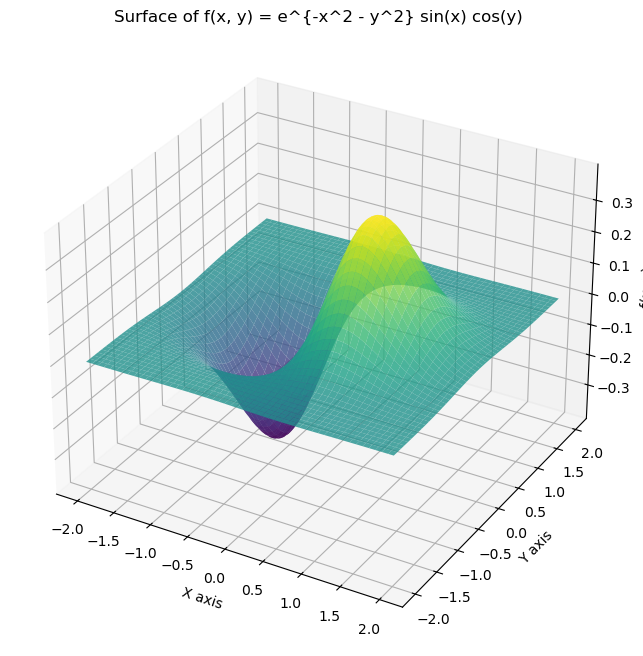

In [35]:
# Grid of x, y points
f = ExpTrig()

f.display_function()

## Partial Derivatives

---
**Task 3 (medium): Backward pass**
1. On a piece of paper, find the partial derivatives of the function `f(x,y)`
  with respect to `x`
 and `y`
 ( i.e. $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$):

2. Implement the functions `df_dx`
 and `df_dy`
 in the `ExpTrig`
 class, which return the values of the partial derivatives for a given `x`
 and `y`
.


3. Implement the `backward`
 pass method in the `ExpTrig`
 class, so that it returns the gradient evaluated in x, y.



---
## Optimization Method
Basic gradient descent minimizes the function by iteratively adjusting variables in the opposite direction of the gradient:  
$$ x_{t+1} = x_{t} -\nabla_x f(x)_{t} \lambda,$$

where $\lambda$ is the learning rate and $t$ refers to the interation step.
In the following steps you will implement gradient descent of the function $f(x,y)$, as implemented in the class `ExpTrig`
.

---
**Task 4 (medium): Gradient descent👩‍💻**
Implementing the `optimize_function`
 involves a series of steps that must be carried out both before and within the function itself. Here's a step-by-step guide:
1. **Initialize Coordinates**: Start by initializing `x`
 and `y`
 with `start_x`
 and `start_y`
, respectively.

2. **Initialize History Lists**: Create two lists, `x_all`
 and `y_all`
, to record the history of coordinates visited during the optimization.

3. **Start Gradient Descent Loop**: Implement a loop that runs for the number of iterations specified. Within each iteration:
    - Use the `backward`
 method of `func`
 to compute the gradients at the current `(x, y)`
.
    - Update `x`
 and `y`
 by taking a step in the direction opposite to the gradient, scaled by the `learning_rate`
.


4. **Logging (optional)**: Add a logging mechanism to print the current state of optimization. For example, after every 25 iterations, print the current iteration number, `x`
, `y`
, and the function value at this point.

5. **Record History**: In each iteration, append the current values of `x`
 and `y`
 to `x_all`
 and `y_all`
 respectively.

6. **Return the Result**: After completing all iterations, return `x_all`
 and `y_all`
.



---

In [44]:
def optimize_function(func, start_x, start_y, learning_rate, iterations, debug=False):
    """
    Optimize a given function using gradient descent.

    Args:
    - func (Function): A function object that must have 'forward' and 'backward' methods.
                       The 'forward' method computes the function value at a given point (x, y),
                       and the 'backward' method computes the gradient at that point.
    - start_x (float): The starting x-coordinate for the optimization.
    - start_y (float): The starting y-coordinate for the optimization.
    - learning_rate (float): The step size for each iteration in the gradient descent.
    - iterations (int): The total number of iterations for the optimization process.

    Returns:
    - x_all (list of float): List of all x-coordinates of the points visited during the optimization.
    - y_all (list of float): List of all y-coordinates of the points visited during the optimization.

    This function performs gradient descent on the provided function object. Starting from 
    (start_x, start_y), it iteratively moves in the direction opposite to the gradient, 
    with step sizes determined by the learning rate. The function's value and current 
    coordinates are printed every 25 iterations. The function returns the history of 
    coordinates visited during the optimization.
    """
    x_all = []
    y_all = []
    x = start_x
    y = start_y

    for i in range(iterations):
        x_gradient, y_gradient = func.backward(x, y)
        x = x - (x_gradient * learning_rate)
        y = y - (y_gradient * learning_rate)

        x_all.append(x)
        y_all.append(y)

        if debug and (i + 1) % 25 == 0:
            print("Iteration {}: x = {}, y = {}, f(x, y) = {}".format(i + 1, x, y, func.forward(x, y)))

    return (x_all, y_all)
    # Write the optimization rutine here

# Example optimization
x_arr, y_arr = optimize_function(ExpTrig(), start_x=-1.5, start_y=-1., learning_rate=0.2, iterations=100, debug=True)

Iteration 25: x = -1.072268560488667, y = -0.9172096238355587, f(x, y) = -0.07292433284356199
Iteration 50: x = -0.008742170324505597, y = -0.6533822517259116, f(x, y) = -0.004529130063334185
Iteration 75: x = -9.786897902957428e-06, y = -0.6532711880281598, f(x, y) = -5.072000142486511e-06
Iteration 100: x = -1.0955608672125375e-08, y = -0.653271187094411, f(x, y) = -5.677677381611091e-09


In the last snippet of code. We plot the optimization path of the `optimize_function`
 for the `ExpTrig`



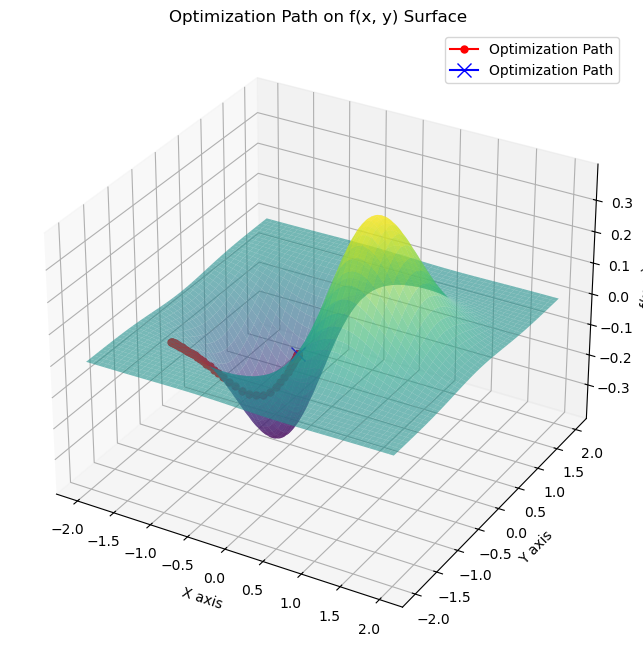

In [45]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
x, y = np.meshgrid(x, y)
z = ExpTrig().forward(x,y)

# Assuming you have lists `x_values` and `y_values` containing the optimization path
x_values = np.array(x_arr)
y_values = np.array(y_arr)
z_values = np.exp(-np.array(x_values)**2 - np.array(y_values)**2) * np.sin(x_values) * np.cos(y_values)

# Plot the optimization path on the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', alpha=0.6)
ax.plot(x_values, y_values, z_values, marker='o', color='r', markersize=5, label='Optimization Path')
ax.plot(x_values[-1], y_values[-1], z_values[-1], marker='x', color='b', markersize=10, label='Optimization Path')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('f(x, y)')
ax.set_title('Optimization Path on f(x, y) Surface')
ax.legend()
plt.show()


---
**Task 5 (medium): Reflection💡**
Access the proficiency of the of the gradient descent algorithm
1. Use the the following starting positions:

$$x_{start}=1.5, y_{start}=1.5 $$


$$x_{start}=-1.5,  y_{start}=-1.5$$


$$x_{start}=-1.0, y_{start}=1.3$$


$$x_{start}=1.2, y_{start}=-1.5$$


- What do you observe?
- Explain why the optimization function sometimes fails to find the $\textbf{global}$ minimum?

2. Do different learning rates (try $\tau= \{0.1,0.5,1.0\}$ ) affect the result?
3. List 2 different issues with a simple gradient descent optimization function.    
    - List a potential solution for each of the problems. 




---

1. See code below
    - Choosing a correct starting position can greatly influence how many steps the gradient descent needs to take
    - There can be many reasons, but two that are relevant to the task are bad starting points and incorrect learning rates. Both can lead to a hard time finding the global minimum
2. Yes, as shown in the last graphs with larger learning rates bigger "steps" are taken
3. Answer
    1. Slow convergence --> more complex algorithms can solve this (doesn't seem to be covered in the literature)
    2. Non-convex functions can get stuck in local minima --> implement momentum (after going downhill sometimes, the function can continue up for some time)

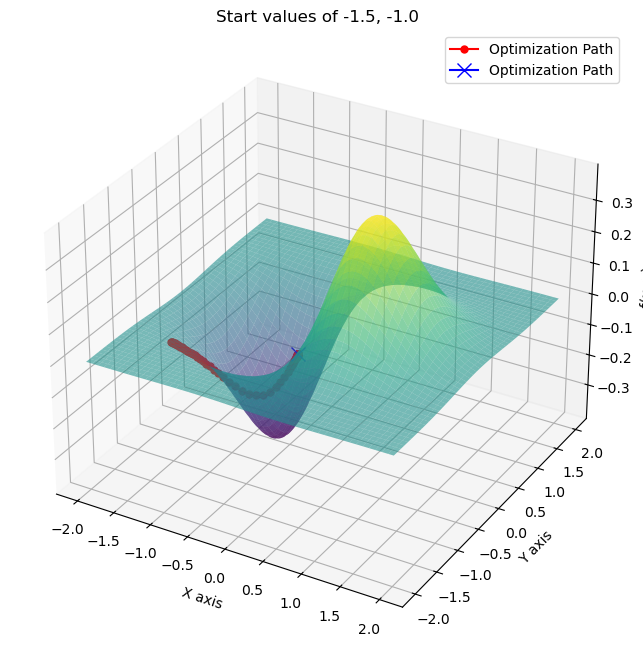

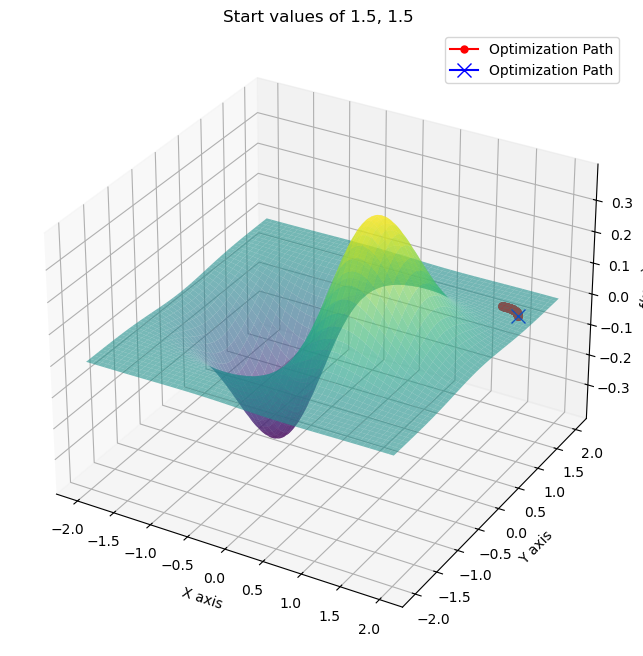

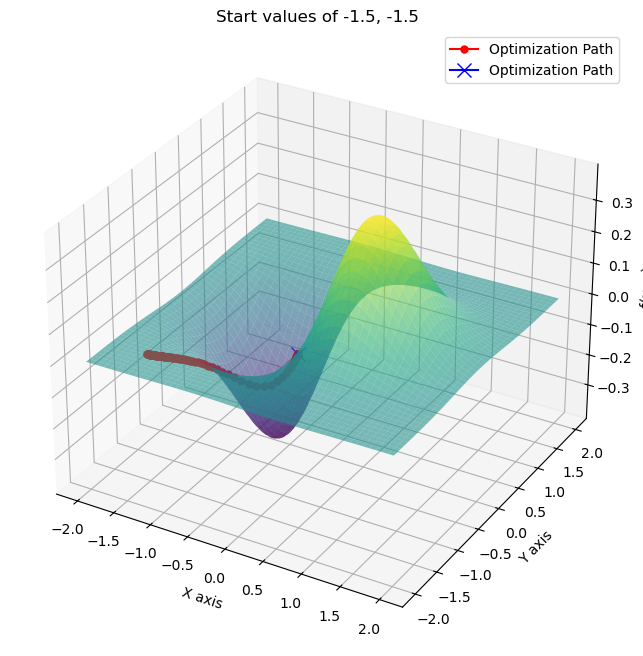

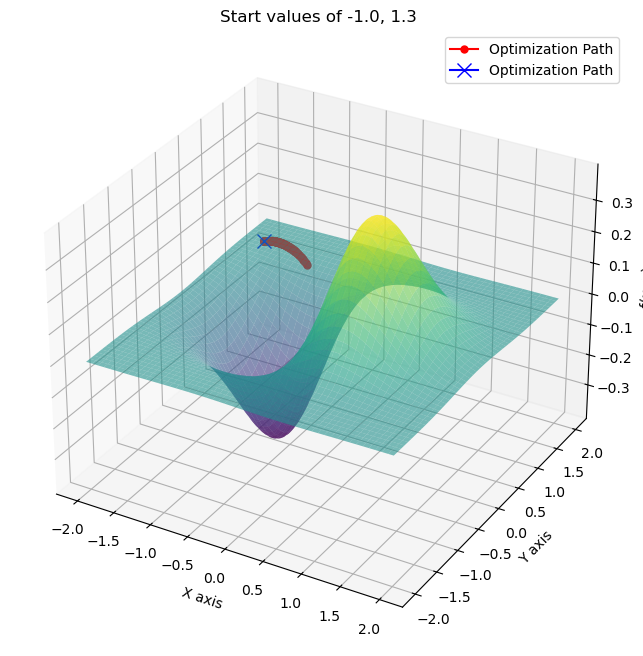

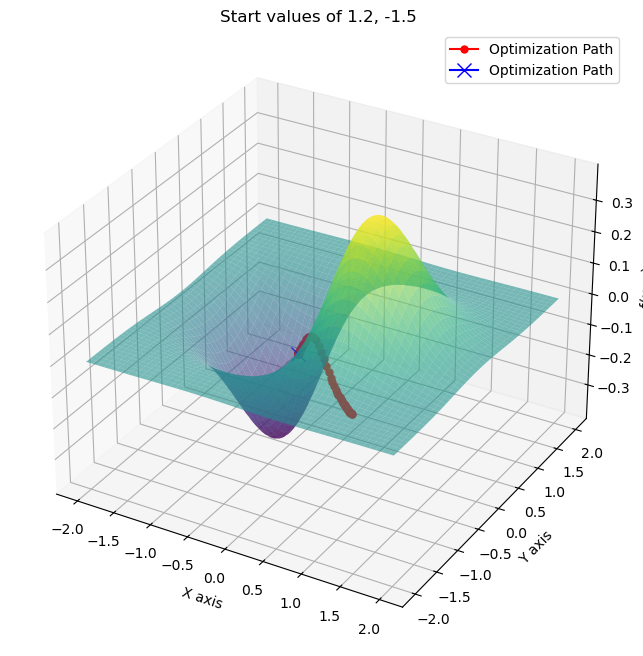

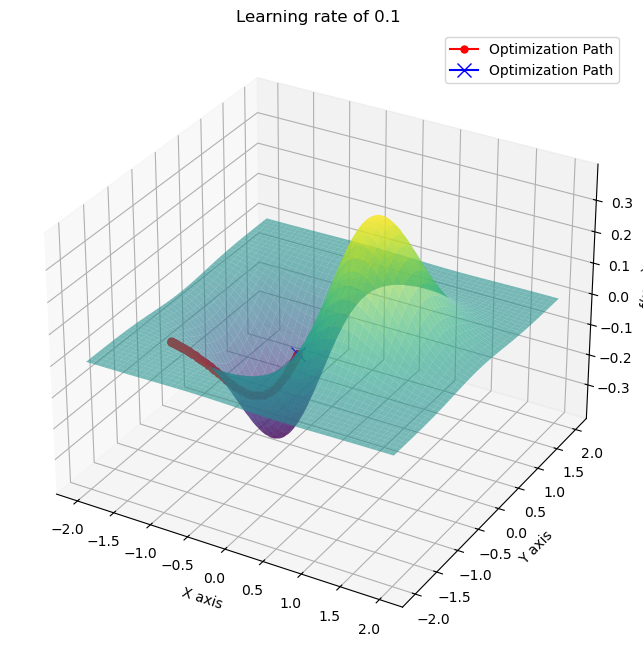

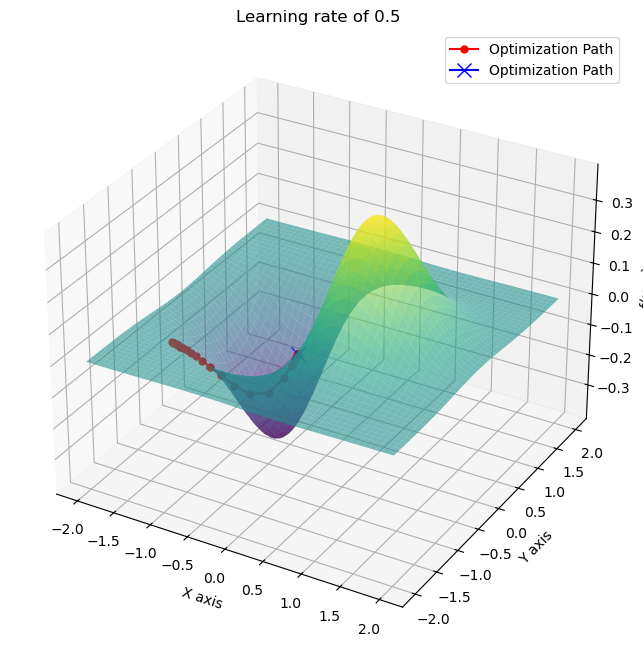

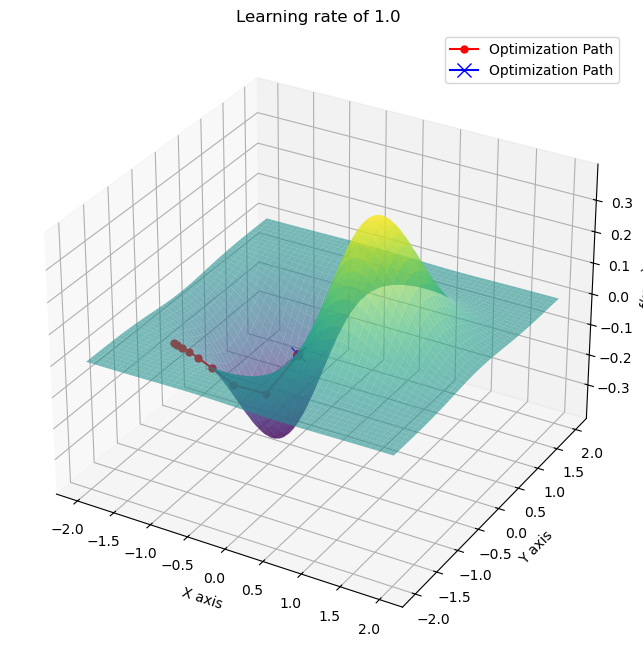

In [46]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
x, y = np.meshgrid(x, y)
z = ExpTrig().forward(x,y)

for x_start, y_start in [(-1.5, -1.0), (1.5, 1.5), (-1.5, -1.5), (-1.0, 1.3), (1.2, -1.5)]:
    x_arr, y_arr = optimize_function(ExpTrig(), start_x=x_start, start_y=y_start, learning_rate=0.2, iterations=300)

    x_values = np.array(x_arr)
    y_values = np.array(y_arr)
    z_values = np.exp(-np.array(x_values)**2 - np.array(y_values)**2) * np.sin(x_values) * np.cos(y_values)

    # Plot the optimization path on the surface
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='viridis', alpha=0.6)
    ax.plot(x_values, y_values, z_values, marker='o', color='r', markersize=5, label='Optimization Path')
    ax.plot(x_values[-1], y_values[-1], z_values[-1], marker='x', color='b', markersize=10, label='Optimization Path')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('f(x, y)')
    ax.set_title(f'Start values of {x_start}, {y_start}')
    ax.legend()
    plt.show()
    
for learning_rate in [0.1, 0.5, 1.0]:
    x_arr, y_arr = optimize_function(ExpTrig(), start_x=-1.5, start_y=-1, learning_rate=learning_rate, iterations=300)

    x_values = np.array(x_arr)
    y_values = np.array(y_arr)
    z_values = np.exp(-np.array(x_values)**2 - np.array(y_values)**2) * np.sin(x_values) * np.cos(y_values)

    # Plot the optimization path on the surface
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='viridis', alpha=0.6)
    ax.plot(x_values, y_values, z_values, marker='o', color='r', markersize=5, label='Optimization Path')
    ax.plot(x_values[-1], y_values[-1], z_values[-1], marker='x', color='b', markersize=10, label='Optimization Path')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('f(x, y)')
    ax.set_title(f'Learning rate of {learning_rate}')
    ax.legend()
    plt.show()
    